In [4]:
!pip install opencv-python

     |████████████████████████████████| 50.4 MB 89 kB/s  eta 0:00:01


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [3]:
DATASET_PATH = "./fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images', 'styles', 'images.csv', '.DS_Store', 'styles.csv']


In [4]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [5]:
import cv2

In [6]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

In [7]:
def img_path(img):
    return DATASET_PATH+"/images/"+img


In [8]:
def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

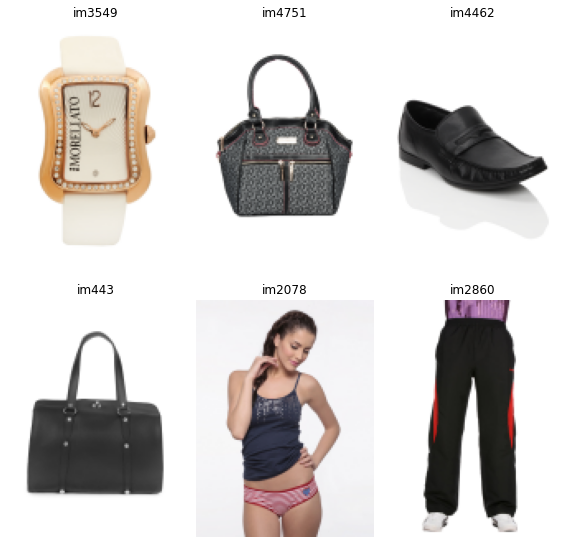

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

<AxesSubplot:>

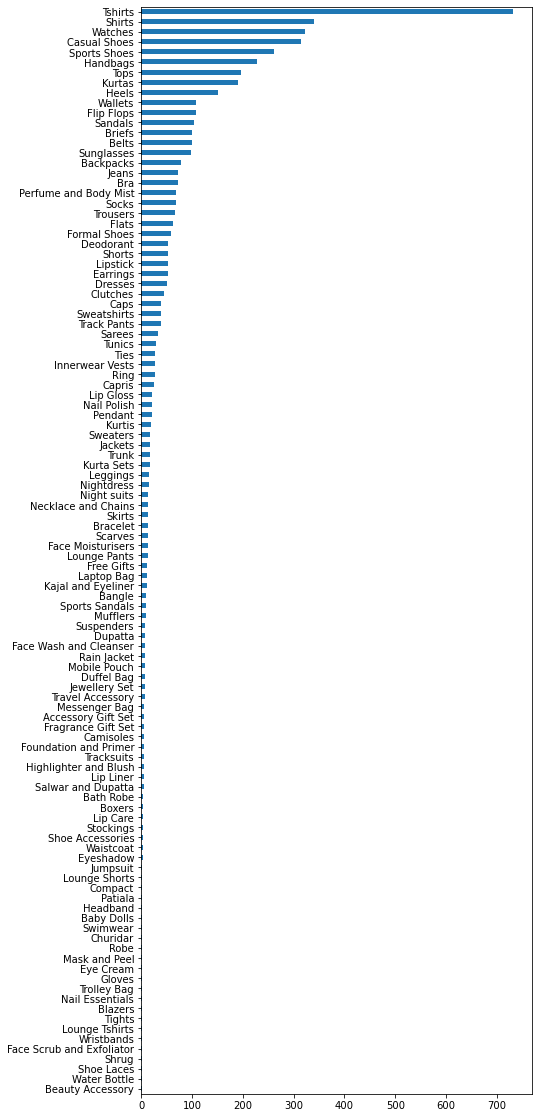

In [10]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [105]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.4.0'

In [12]:
!pip install tensorflow

     |████████████████████████▋       | 303.4 MB 121.8 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 394.8 MB 11 kB/s 
     |████████████████████████████████| 127 kB 70.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 297 kB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 113.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 127 kB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 99 kB/s /s eta 0:00:01
     |████████████████████████████████| 10.6 MB 125.6 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 92.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 11.7 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 94.0 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 836 kB/s s eta 0:00:01
     |████████████████████████████████| 47 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 119.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 

In [14]:
!pip install keras

In [106]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [182]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [150]:
def get_embedding(model, img_name):
#     failed=[]
    try:
        # Reshape
        img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
        #     print(img_name)
        # img to Array
        x   = image.img_to_array(img)
        # Expand Dim (1, w, h)
        x   = np.expand_dims(x, axis=0)
        # Pre process Input
        x   = preprocess_input(x)
        return model.predict(x).reshape(-1)
    except:
        print(img_name)
        return np.nan
        

In [151]:
# Get item Embedding

emb = get_embedding(model, df_filtered.iloc[0].image)
emb.shape

(2048,)

(240, 180, 3)
[ 5.6613073  2.3661575  0.        ...  1.3138641  0.        10.820532 ]


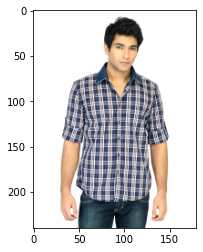

In [152]:
img_array = load_image(df_filtered.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [153]:
df_filtered.shape

(4929, 11)

In [154]:
# Get Embedding for all itens in dataset

%time
#import swifter

# Parallel apply
df_sample      = df_filtered#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
7561.jpg
7559.jpg
7557.jpg
(4929, 2048)


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.661307,2.366158,0.000000,3.255731,0.845209,2.673842,8.780887,6.280788,0.787185,1.587664,...,2.463606,0.000000,1.825987,20.485268,3.902869,0.000000,8.225967,1.313864,0.000000,10.820532
1,5.790414,9.593639,0.000000,9.431692,0.287236,0.259948,17.028763,3.037450,0.136343,0.000000,...,1.670570,0.013893,10.338679,4.784726,0.189141,0.000000,7.739130,0.372691,0.000000,8.903800
2,0.000000,3.162258,0.484688,0.172308,2.609541,3.840854,3.426137,0.253247,1.098899,1.418282,...,0.434925,14.092833,3.018745,2.134508,2.549056,0.377388,6.180357,0.636617,14.018167,11.415053
3,5.882205,1.958613,0.000000,12.519889,0.000000,0.000000,9.383586,3.781626,0.000000,1.490624,...,17.825478,0.000000,3.592509,2.042303,0.000000,0.000000,6.656785,1.457316,1.694212,1.403331
4,0.245960,17.383429,0.493822,3.374462,2.567363,0.000000,6.482548,5.862633,0.000000,3.164866,...,4.464024,0.447082,1.448134,12.884136,0.000000,0.397489,5.028069,1.939696,0.000000,11.485394


In [235]:
df_embs.shape

(4929, 2048)

In [126]:
df_clean = df_embs.dropna()

In [128]:
df_clean.shape

(4926, 2048)

In [131]:
df_clean.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.661307,2.366158,0.000000,3.255731,0.845209,2.673842,8.780887,6.280788,0.787185,1.587664,...,2.463606,0.000000,1.825987,20.485268,3.902869,0.000000,8.225967,1.313864,0.000000,10.820532
1,5.790414,9.593639,0.000000,9.431692,0.287236,0.259948,17.028763,3.037450,0.136343,0.000000,...,1.670570,0.013893,10.338679,4.784726,0.189141,0.000000,7.739130,0.372691,0.000000,8.903800
2,0.000000,3.162258,0.484688,0.172308,2.609541,3.840854,3.426137,0.253247,1.098899,1.418282,...,0.434925,14.092833,3.018745,2.134508,2.549056,0.377388,6.180357,0.636617,14.018167,11.415053
3,5.882205,1.958613,0.000000,12.519889,0.000000,0.000000,9.383586,3.781626,0.000000,1.490624,...,17.825478,0.000000,3.592509,2.042303,0.000000,0.000000,6.656785,1.457316,1.694212,1.403331
4,0.245960,17.383429,0.493822,3.374462,2.567363,0.000000,6.482548,5.862633,0.000000,3.164866,...,4.464024,0.447082,1.448134,12.884136,0.000000,0.397489,5.028069,1.939696,0.000000,11.485394
5,0.028536,18.567099,0.000000,0.757251,1.504947,0.000000,1.982038,2.963789,1.072763,4.539297,...,3.247076,4.273135,3.088634,16.997051,0.000000,0.000000,2.258091,1.595797,0.000000,7.674056
6,5.238218,15.406445,0.658231,0.047125,0.000000,0.766971,4.950335,11.245586,0.215069,0.776225,...,3.392008,0.643812,0.575796,12.634217,0.000000,2.745304,0.953840,4.782494,0.000000,8.277120
7,1.153966,3.894161,0.118725,4.157025,0.000000,0.000000,1.296948,1.380127,1.428335,3.396727,...,4.892046,4.481520,3.961407,17.455627,0.000000,0.000000,2.673182,2.615758,0.000000,7.662076
8,1.130996,9.553247,0.000000,1.630982,0.000000,0.061760,1.495949,3.292385,0.877974,1.248617,...,1.005478,1.456308,6.612021,0.000000,0.923177,0.000000,19.448326,0.000000,0.000000,0.000000
9,5.351165,5.560222,0.209273,3.735474,0.227953,0.142832,6.727965,14.107298,6.241446,2.581975,...,2.008596,12.222114,13.873074,2.261485,3.321212,0.000000,3.799256,0.000000,0.000000,2.500904


# Cosine Similarity

In [132]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances


In [134]:
# Calcule DIstance Matrix
cosine_sim = 1-pairwise_distances(df_clean, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.71344979, 0.45427249, 0.67970612],
       [0.71344979, 1.        , 0.41515342, 0.83330936],
       [0.45427249, 0.41515342, 1.        , 0.44629509],
       [0.67970612, 0.83330936, 0.44629509, 1.        ]])

In [135]:
indices = pd.Series(range(len(df_clean)), index=df_clean.index)
indices


0          0
1          1
2          2
3          3
4          4
        ... 
4995    4921
4996    4922
4997    4923
4998    4924
4999    4925
Length: 4926, dtype: int64

In [62]:
rejected = ['7990.jpg',
 '8110.jpg',
 '7964.jpg',
 '7731.jpg',
 '7503.jpg',
 '7963.jpg',
 '8117.jpg',
 '7709.jpg',
 '7504.jpg',
 '7736.jpg',
 '7955.jpg',
 '8121.jpg',
 '7532.jpg',
 '7700.jpg',
 '8126.jpg',
 '7952.jpg',
 '7707.jpg',
 '7535.jpg',
 '8119.jpg',
 '7595.jpg',
 '7753.jpg',
 '7939.jpg',
 '7798.jpg',
 '7906.jpg',
 '8172.jpg',
 '7754.jpg',
 '7566.jpg',
 '7592.jpg',
 '8175.jpg',
 '7901.jpg',
 '8181.jpg',
 '7908.jpg',
 '7796.jpg',
 '8143.jpg',
 '7937.jpg',
 '7791.jpg',
 '7568.jpg',
 '7930.jpg',
 '8144.jpg',
 '7953.jpg',
 '7739.jpg',
 '7534.jpg',
 '7706.jpg',
 '8118.jpg',
 '8120.jpg',
 '7954.jpg',
 '7701.jpg',
 '7533.jpg',
 '7996.jpg',
 '8116.jpg',
 '7962.jpg',
 '7708.jpg',
 '7737.jpg',
 '7505.jpg',
 '8129.jpg',
 '7965.jpg',
 '8111.jpg',
 '7502.jpg',
 '7730.jpg',
 '7764.jpg',
 '7790.jpg',
 '7569.jpg',
 '8145.jpg',
 '7931.jpg',
 '7797.jpg',
 '7551.jpg',
 '7763.jpg',
 '7909.jpg',
 '7936.jpg',
 '8142.jpg',
 '7593.jpg',
 '7567.jpg',
 '7755.jpg',
 '8180.jpg',
 '7752.jpg',
 '7560.jpg',
 '7938.jpg',
 '7594.jpg',
 '7907.jpg',
 '7799.jpg',
 '7881.jpg',
 '7875.jpg',
 '7618.jpg',
 '8030.jpg',
 '7844.jpg',
 '7611.jpg',
 '7843.jpg',
 '39403.jpg',
 '7629.jpg',
 '7888.jpg',
 '7616.jpg',
 '7642.jpg',
 '7828.jpg',
 '7689.jpg',
 '8063.jpg',
 '7817.jpg',
 '7645.jpg',
 '7810.jpg',
 '8064.jpg',
 '8090.jpg',
 '7673.jpg',
 '7819.jpg',
 '8099.jpg',
 '7687.jpg',
 '7826.jpg',
 '7680.jpg',
 '7674.jpg',
 '7479.jpg',
 '7842.jpg',
 '7617.jpg',
 '7889.jpg',
 '7845.jpg',
 '7610.jpg',
 '7887.jpg',
 '7873.jpg',
 '7619.jpg',
 '7626.jpg',
 '7874.jpg',
 '7880.jpg',
 '7621.jpg',
 '7675.jpg',
 '7681.jpg',
 '7820.jpg',
 '8098.jpg',
 '7686.jpg',
 '7672.jpg',
 '7818.jpg',
 '7827.jpg',
 '7644.jpg',
 '8091.jpg',
 '8065.jpg',
 '7811.jpg',
 '7643.jpg',
 '7829.jpg',
 '7816.jpg',
 '7688.jpg',
 '8096.jpg',
 '8040.jpg',
 '7834.jpg',
 '7498.jpg',
 '7661.jpg',
 '7695.jpg',
 '7833.jpg',
 '8047.jpg',
 '7659.jpg',
 '7692.jpg',
 '7666.jpg',
 '8078.jpg',
 '8085.jpg',
 '7805.jpg',
 '8071.jpg',
 '7496.jpg',
 '7650.jpg',
 '8076.jpg',
 '7802.jpg',
 '7668.jpg',
 '8082.jpg',
 '7657.jpg',
 '7491.jpg',
 '7603.jpg',
 '7869.jpg',
 '7856.jpg',
 '8022.jpg',
 '7604.jpg',
 '7851.jpg',
 '7632.jpg',
 '7858.jpg',
 '7867.jpg',
 '7635.jpg',
 '7860.jpg',
 '8014.jpg',
 '8083.jpg',
 '7803.jpg',
 '8077.jpg',
 '7669.jpg',
 '7490.jpg',
 '7656.jpg',
 '7804.jpg',
 '8084.jpg',
 '7651.jpg',
 '7497.jpg',
 '7832.jpg',
 '7658.jpg',
 '7667.jpg',
 '8079.jpg',
 '7693.jpg',
 '7499.jpg',
 '7835.jpg',
 '7694.jpg',
 '7660.jpg',
 '7634.jpg',
 '7895.jpg',
 '7861.jpg',
 '7633.jpg',
 '7859.jpg',
 '7866.jpg',
 '8012.jpg',
 '7892.jpg',
 '7605.jpg',
 '39410.jpg',
 '7850.jpg',
 '7602.jpg',
 '7868.jpg',
 '7857.jpg',
 '7925.jpg',
 '8151.jpg',
 '7589.jpg',
 '7770.jpg',
 '7784.jpg',
 '8156.jpg',
 '7922.jpg',
 '7748.jpg',
 '7783.jpg',
 '7777.jpg',
 '8169.jpg',
 '8160.jpg',
 '7914.jpg',
 '7587.jpg',
 '7741.jpg',
 '7573.jpg',
 '7913.jpg',
 '8167.jpg',
 '7779.jpg',
 '7574.jpg',
 '7746.jpg',
 '7580.jpg',
 '7712.jpg',
 '7520.jpg',
 '8133.jpg',
 '7947.jpg',
 '7527.jpg',
 '7715.jpg',
 '7518.jpg',
 '7940.jpg',
 '8134.jpg',
 '7511.jpg',
 '7723.jpg',
 '7949.jpg',
 '8102.jpg',
 '7724.jpg',
 '7516.jpg',
 '7529.jpg',
 '7971.jpg',
 '7985.jpg',
 '8166.jpg',
 '7778.jpg',
 '7581.jpg',
 '7747.jpg',
 '7575.jpg',
 '8159.jpg',
 '7915.jpg',
 '8161.jpg',
 '7572.jpg',
 '7586.jpg',
 '7923.jpg',
 '8157.jpg',
 '7749.jpg',
 '7544.jpg',
 '7776.jpg',
 '7782.jpg',
 '7588.jpg',
 '8150.jpg',
 '7924.jpg',
 '7785.jpg',
 '7771.jpg',
 '7517.jpg',
 '7528.jpg',
 '7970.jpg',
 '8104.jpg',
 '7722.jpg',
 '7510.jpg',
 '7948.jpg',
 '8103.jpg',
 '7714.jpg',
 '7526.jpg',
 '7519.jpg',
 '8135.jpg',
 '7941.jpg',
 '7521.jpg',
 '7713.jpg',
 '7979.jpg',
 '7946.jpg',
 '8132.jpg',
 '8149.jpg',
 '7565.jpg',
 '7591.jpg',
 '7768.jpg',
 '7902.jpg',
 '8182.jpg',
 '7596.jpg',
 '7562.jpg',
 '8185.jpg',
 '7905.jpg',
 '7792.jpg',
 '7766.jpg',
 '7933.jpg',
 '8147.jpg',
 '7761.jpg',
 '7795.jpg',
 '8140.jpg',
 '7934.jpg',
 '7598.jpg',
 '7960.jpg',
 '8114.jpg',
 '7538.jpg',
 '7735.jpg',
 '7507.jpg',
 '8113.jpg',
 '7958.jpg',
 '7500.jpg',
 '7732.jpg',
 '8125.jpg',
 '7951.jpg',
 '7509.jpg',
 '7536.jpg',
 '7704.jpg',
 '7956.jpg',
 '8122.jpg',
 '7969.jpg',
 '7703.jpg',
 '7531.jpg',
 '7794.jpg',
 '7599.jpg',
 '7935.jpg',
 '8141.jpg',
 '7767.jpg',
 '7793.jpg',
 '7758.jpg',
 '8146.jpg',
 '7932.jpg',
 '7563.jpg',
 '7751.jpg',
 '7597.jpg',
 '7904.jpg',
 '8184.jpg',
 '7590.jpg',
 '8148.jpg',
 '7756.jpg',
 '7564.jpg',
 '8183.jpg',
 '7769.jpg',
 '7903.jpg',
 '8123.jpg',
 '7957.jpg',
 '7968.jpg',
 '7530.jpg',
 '7702.jpg',
 '7950.jpg',
 '8124.jpg',
 '7508.jpg',
 '7705.jpg',
 '7537.jpg',
 '7966.jpg',
 '8112.jpg',
 '7959.jpg',
 '7733.jpg',
 '7501.jpg',
 '8115.jpg',
 '7961.jpg',
 '7506.jpg',
 '7734.jpg',
 '7646.jpg',
 '7679.jpg',
 '7813.jpg',
 '8067.jpg',
 '8093.jpg',
 '7641.jpg',
 '8094.jpg',
 '7814.jpg',
 '7683.jpg',
 '7677.jpg',
 '7648.jpg',
 '8056.jpg',
 '7822.jpg',
 '7670.jpg',
 '7684.jpg',
 '7871.jpg',
 '7885.jpg',
 '7624.jpg',
 '7882.jpg',
 '7876.jpg',
 '8002.jpg',
 '7623.jpg',
 '7840.jpg',
 '7615.jpg',
 '7847.jpg',
 '7878.jpg',
 '7612.jpg',
 '7685.jpg',
 '7671.jpg',
 '8050.jpg',
 '7824.jpg',
 '8068.jpg',
 '7676.jpg',
 '7682.jpg',
 '7649.jpg',
 '7823.jpg',
 '7640.jpg',
 '7815.jpg',
 '8095.jpg',
 '7647.jpg',
 '8092.jpg',
 '7678.jpg',
 '8066.jpg',
 '7812.jpg',
 '7846.jpg',
 '7879.jpg',
 '7613.jpg',
 '7841.jpg',
 '39401.jpg',
 '7614.jpg',
 '8003.jpg',
 '7877.jpg',
 '7883.jpg',
 '7848.jpg',
 '7622.jpg',
 '7884.jpg',
 '7870.jpg',
 '8004.jpg',
 '7625.jpg',
 '7607.jpg',
 '7638.jpg',
 '8026.jpg',
 '7852.jpg',
 '7600.jpg',
 '7855.jpg',
 '7636.jpg',
 '7609.jpg',
 '7863.jpg',
 '8017.jpg',
 '7631.jpg',
 '7890.jpg',
 '7864.jpg',
 '7830.jpg',
 '7691.jpg',
 '7665.jpg',
 '7837.jpg',
 '7808.jpg',
 '7662.jpg',
 '7696.jpg',
 '8088.jpg',
 '8075.jpg',
 '7801.jpg',
 '8081.jpg',
 '7654.jpg',
 '7492.jpg',
 '8086.jpg',
 '7698.jpg',
 '7806.jpg',
 '8072.jpg',
 '7495.jpg',
 '7653.jpg',
 '7630.jpg',
 '7865.jpg',
 '8011.jpg',
 '39425.jpg',
 '7891.jpg',
 '7637.jpg',
 '7896.jpg',
 '7608.jpg',
 '7862.jpg',
 '7601.jpg',
 '8020.jpg',
 '7854.jpg',
 '8018.jpg',
 '7606.jpg',
 '7898.jpg',
 '7639.jpg',
 '7853.jpg',
 '8073.jpg',
 '7807.jpg',
 '8087.jpg',
 '7699.jpg',
 '7838.jpg',
 '7652.jpg',
 '7494.jpg',
 '8080.jpg',
 '7800.jpg',
 '8074.jpg',
 '7493.jpg',
 '7655.jpg',
 '7836.jpg',
 '7697.jpg',
 '8089.jpg',
 '7809.jpg',
 '7663.jpg',
 '7831.jpg',
 '7664.jpg',
 '7690.jpg',
 '7988.jpg',
 '8108.jpg',
 '7716.jpg',
 '7524.jpg',
 '7729.jpg',
 '7943.jpg',
 '8137.jpg',
 '7523.jpg',
 '8130.jpg',
 '7944.jpg',
 '8139.jpg',
 '7515.jpg',
 '7727.jpg',
 '8106.jpg']


In [136]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df_clean, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

In [137]:
get_recommender(2993, df, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9236277427897499,
  0.9223263634197706,
  0.9190421456998448,
  0.9150866312285145,
  0.913116940948047])

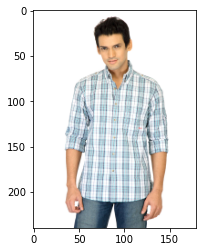

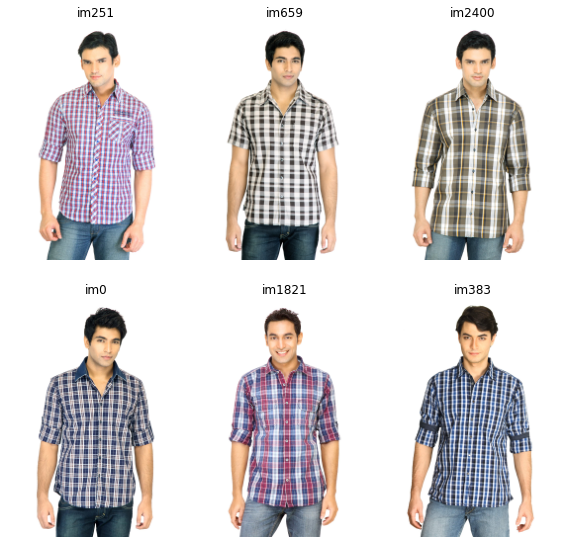

In [138]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_clean, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)


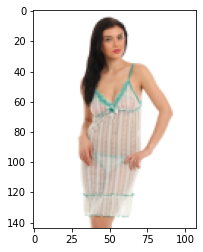

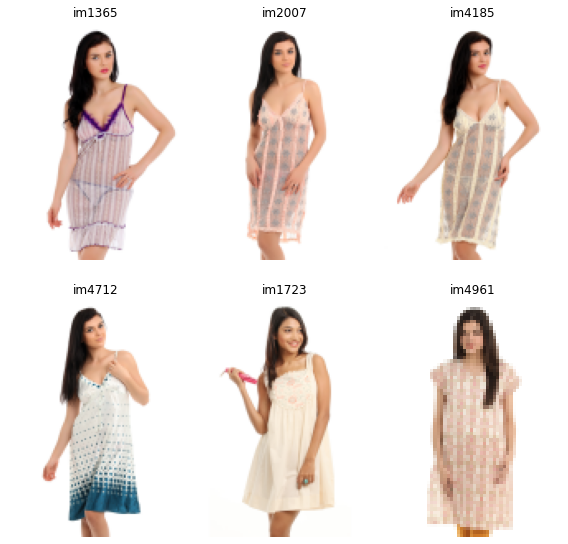

In [139]:
idx_ref = 878

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_clean, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

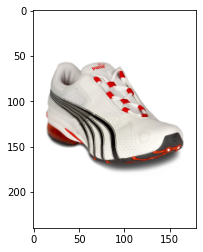

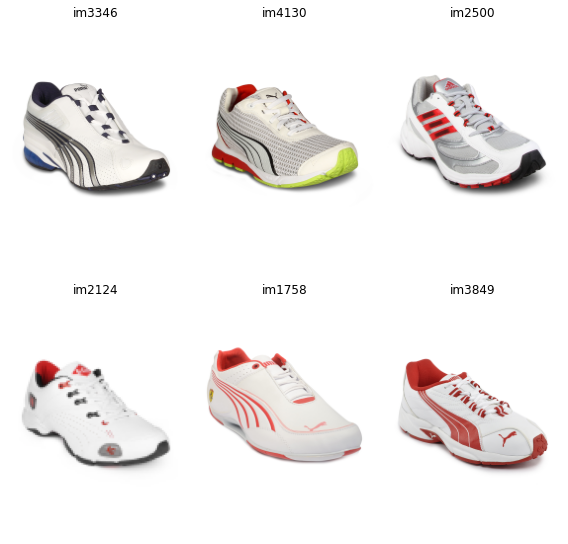

In [268]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_clean, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

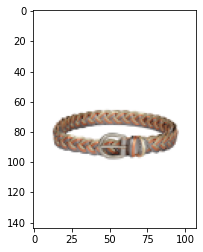

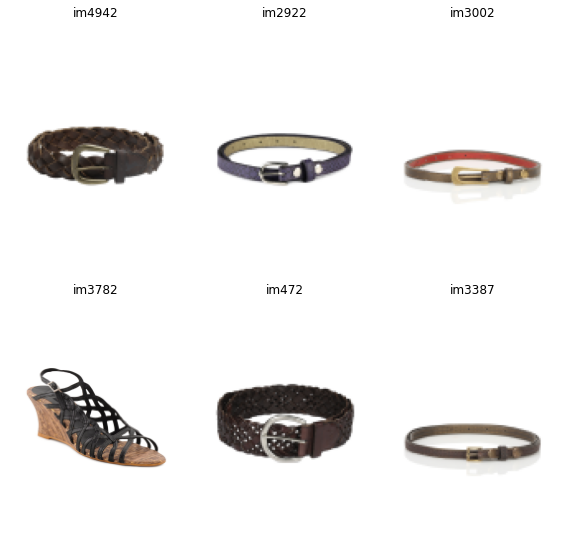

In [269]:
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_clean, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [157]:
rejected.append('7561.jpg')

In [158]:
rejected.append('7559.jpg')

In [159]:
rejected.append('7557.jpg')

In [160]:
df_rejected = pd.DataFrame(rejected, columns = ['reject'])

In [163]:
df_rejected.shape

(506, 1)

In [98]:
df_filterd = df.head(1000)

In [164]:
df_filtered = df[[image not in df_rejected.values for image in df['image']]]

In [165]:
len(df_filtered)

4926

In [104]:
df_filtered.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


# Visualization Latent Space of Contents 

In [142]:
from sklearn.manifold import TSNE
import time
import seaborn as sns

In [144]:
df_filtered.head()


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [149]:
df_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,tsne-2d-one,tsne-2d-two
0,5.661307,2.366158,0.000000,3.255731,0.845209,2.673842,8.780887,6.280788,0.787185,1.587664,...,1.825987,20.485268,3.902869,0.000000,8.225967,1.313864,0.000000,10.820532,6.402668,-2.552314
1,5.790414,9.593639,0.000000,9.431692,0.287236,0.259948,17.028763,3.037450,0.136343,0.000000,...,10.338679,4.784726,0.189141,0.000000,7.739130,0.372691,0.000000,8.903800,-0.191845,-8.053858
2,0.000000,3.162258,0.484688,0.172308,2.609541,3.840854,3.426137,0.253247,1.098899,1.418282,...,3.018745,2.134508,2.549056,0.377388,6.180357,0.636617,14.018167,11.415053,-10.900000,1.314415
3,5.882205,1.958613,0.000000,12.519889,0.000000,0.000000,9.383586,3.781626,0.000000,1.490624,...,3.592509,2.042303,0.000000,0.000000,6.656785,1.457316,1.694212,1.403331,-0.815359,-8.371066
4,0.245960,17.383429,0.493822,3.374462,2.567363,0.000000,6.482548,5.862633,0.000000,3.164866,...,1.448134,12.884136,0.000000,0.397489,5.028069,1.939696,0.000000,11.485394,8.712672,0.166967


In [166]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_clean)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 7.8878302574157715 seconds


In [167]:
df_filtered['tsne-2d-one'] = tsne_results[:,0]
df_filtered['tsne-2d-two'] = tsne_results[:,1]

<ipython-input-167-65e4c56750df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-167-65e4c56750df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne-2d-two'] = tsne_results[:,1]


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

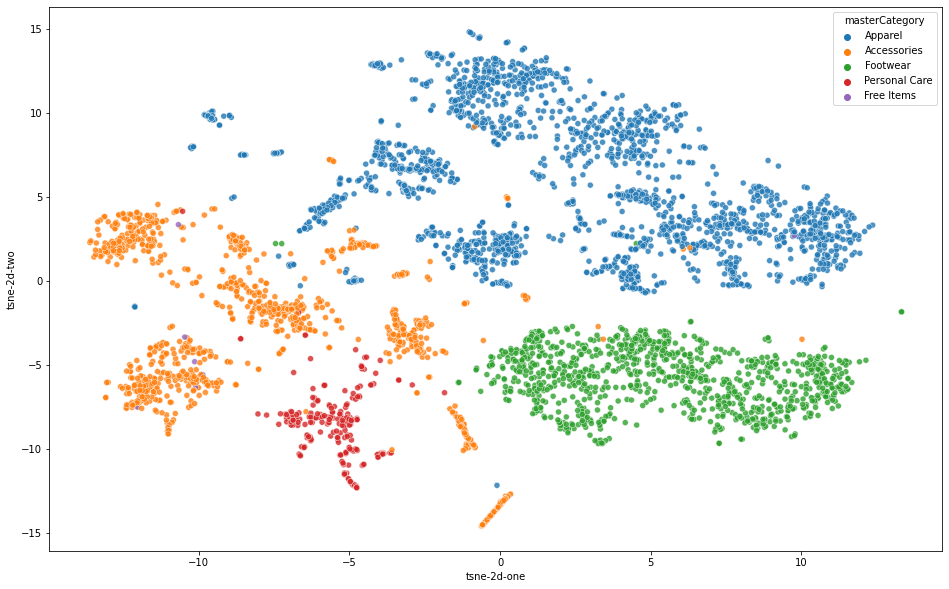

In [169]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="masterCategory",
                data=df_filtered,
                legend="full",
                alpha=0.8)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

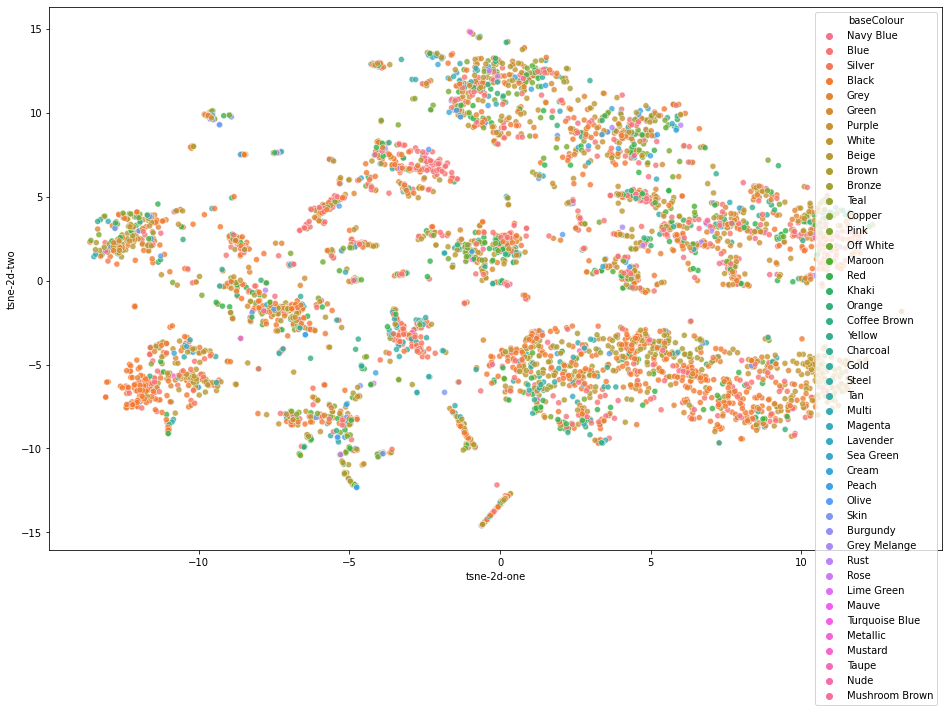

In [231]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="baseColour",
                data=df_filtered,
                legend="full",
                alpha=0.8)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

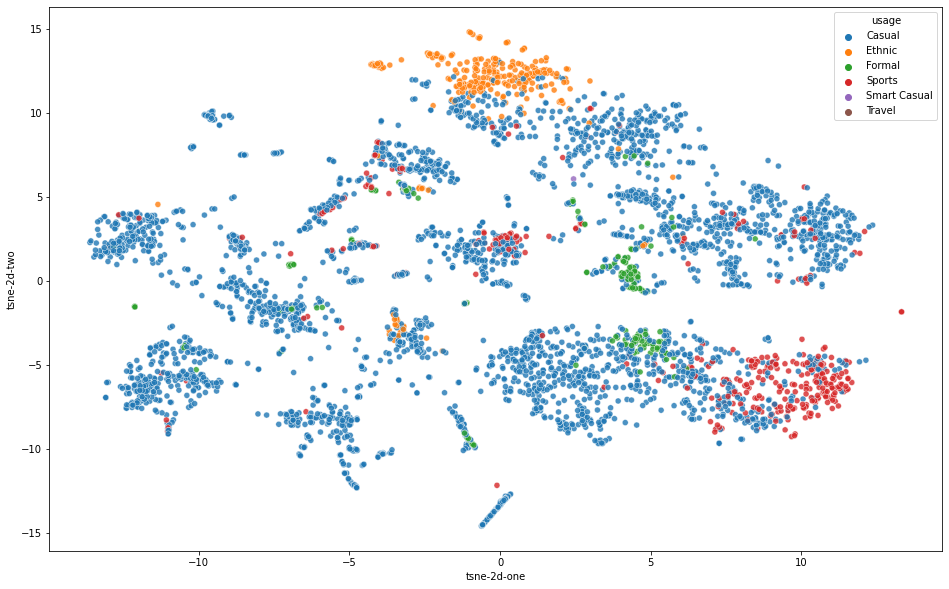

In [233]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="usage",
                data=df_filtered,
                legend="full",
                alpha=0.8)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

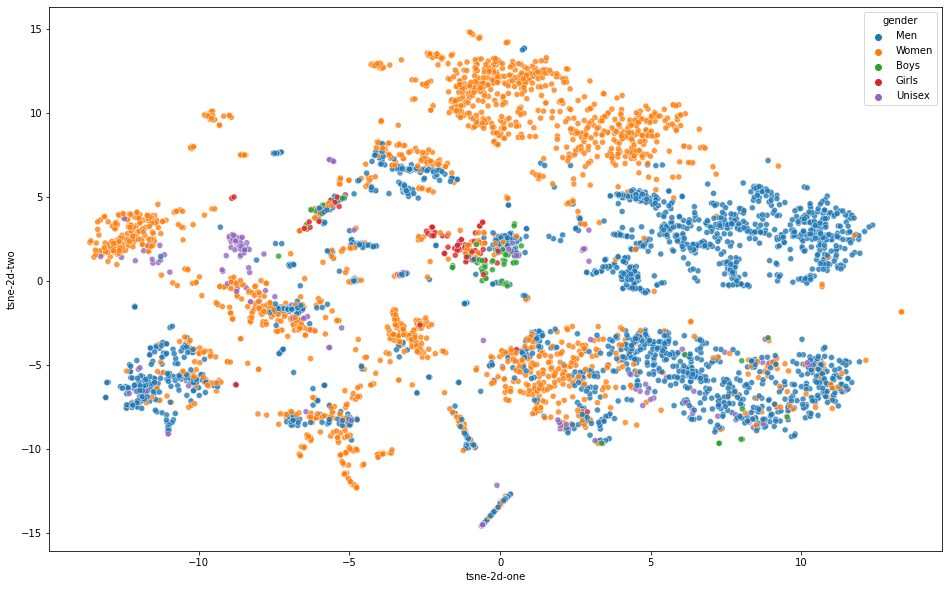

In [232]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="gender",
                data=df_filtered,
                legend="full",
                alpha=0.8)

# Combining tabular data with image embedding

In [173]:
df_clean.shape

(4926, 2050)

In [174]:
df_filtered.shape

(4926, 13)

In [175]:
SEED = 42

In [177]:
df_px = df_clean.drop(['tsne-2d-one','tsne-2d-two'], axis=1)

In [181]:
df_px.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.661307,2.366158,0.000000,3.255731,0.845209,2.673842,8.780887,6.280788,0.787185,1.587664,...,2.463606,0.000000,1.825987,20.485268,3.902869,0.000000,8.225967,1.313864,0.000000,10.820532
1,5.790414,9.593639,0.000000,9.431692,0.287236,0.259948,17.028763,3.037450,0.136343,0.000000,...,1.670570,0.013893,10.338679,4.784726,0.189141,0.000000,7.739130,0.372691,0.000000,8.903800
2,0.000000,3.162258,0.484688,0.172308,2.609541,3.840854,3.426137,0.253247,1.098899,1.418282,...,0.434925,14.092833,3.018745,2.134508,2.549056,0.377388,6.180357,0.636617,14.018167,11.415053
3,5.882205,1.958613,0.000000,12.519889,0.000000,0.000000,9.383586,3.781626,0.000000,1.490624,...,17.825478,0.000000,3.592509,2.042303,0.000000,0.000000,6.656785,1.457316,1.694212,1.403331
4,0.245960,17.383429,0.493822,3.374462,2.567363,0.000000,6.482548,5.862633,0.000000,3.164866,...,4.464024,0.447082,1.448134,12.884136,0.000000,0.397489,5.028069,1.939696,0.000000,11.485394


In [183]:
df_filtered.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,tsne-2d-one,tsne-2d-two
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,4.522418,5.085199
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg,-2.586900,6.614933
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg,-9.330179,-5.923752
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,-3.271358,6.839588
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg,7.642963,3.229184


In [236]:
df_combined = pd.concat([df_filtered, df_px], axis=1)

In [240]:
df_combined.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,0,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,5.661307,...,2.463606,0.000000,1.825987,20.485268,3.902869,0.000000,8.225967,1.313864,0.000000,10.820532
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,5.790414,...,1.670570,0.013893,10.338679,4.784726,0.189141,0.000000,7.739130,0.372691,0.000000,8.903800
2,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,0.000000,...,0.434925,14.092833,3.018745,2.134508,2.549056,0.377388,6.180357,0.636617,14.018167,11.415053
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,5.882205,...,17.825478,0.000000,3.592509,2.042303,0.000000,0.000000,6.656785,1.457316,1.694212,1.403331
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,0.245960,...,4.464024,0.447082,1.448134,12.884136,0.000000,0.397489,5.028069,1.939696,0.000000,11.485394


In [248]:
df_combined.drop(['tsne-2d-one', 'tsne-2d-two', 'image', 'id'], axis=1, inplace=True)

KeyError: "['tsne-2d-one' 'tsne-2d-two' 'image' 'id'] not found in axis"

In [249]:
df_combined.drop(['productDisplayName'], axis=1, inplace=True)

In [257]:
df_combined.shape

(4926, 2056)

In [251]:
dum = ['gender', 
       'masterCategory', 
       'subCategory', 
       'articleType', 
       'baseColour', 
       'season', 
       'year', 
       'usage']

In [258]:
df_onehot = pd.get_dummies(data = df_combined, columns = dum)

In [259]:
df_onehot.head()

,0,1,2,3,4,5,6,7,8,9,...,year_2016,year_2017,year_2018,year_2019,usage_Casual,usage_Ethnic,usage_Formal,usage_Smart Casual,usage_Sports,usage_Travel
0,5.661307,2.366158,0.000000,3.255731,0.845209,2.673842,8.780887,6.280788,0.787185,1.587664,...,0,0,0,0,1,0,0,0,0,0
1,5.790414,9.593639,0.000000,9.431692,0.287236,0.259948,17.028763,3.037450,0.136343,0.000000,...,0,0,0,0,1,0,0,0,0,0
2,0.000000,3.162258,0.484688,0.172308,2.609541,3.840854,3.426137,0.253247,1.098899,1.418282,...,1,0,0,0,1,0,0,0,0,0
3,5.882205,1.958613,0.000000,12.519889,0.000000,0.000000,9.383586,3.781626,0.000000,1.490624,...,0,0,0,0,1,0,0,0,0,0
4,0.245960,17.383429,0.493822,3.374462,2.567363,0.000000,6.482548,5.862633,0.000000,3.164866,...,0,0,0,0,1,0,0,0,0,0


In [260]:
df_onehot.columns

Index([                   0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    7,                    8,
                          9,
       ...
                'year_2016',          'year_2017',          'year_2018',
                'year_2019',       'usage_Casual',       'usage_Ethnic',
             'usage_Formal', 'usage_Smart Casual',       'usage_Sports',
             'usage_Travel'],
      dtype='object', length=2267)

In [261]:
# Calcule DIstance Matrix
cosine_sim = 1-pairwise_distances(df_onehot, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.71341246, 0.45423909, 0.67970008],
       [0.71341246, 1.        , 0.41512499, 0.83327397],
       [0.45423909, 0.41512499, 1.        , 0.44626386],
       [0.67970008, 0.83327397, 0.44626386, 1.        ]])

In [262]:
indices = pd.Series(range(len(df_onehot)), index=df_onehot.index)
indices


0          0
1          1
2          2
3          3
4          4
        ... 
4995    4921
4996    4922
4997    4923
4998    4924
4999    4925
Length: 4926, dtype: int64

In [265]:
get_recommender(2993, df_onehot, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9236220528014014,
  0.9223213554823324,
  0.9190372925530725,
  0.9150821577965341,
  0.9131127841169474])

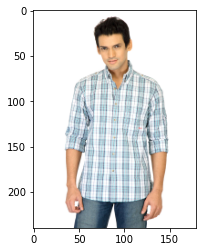

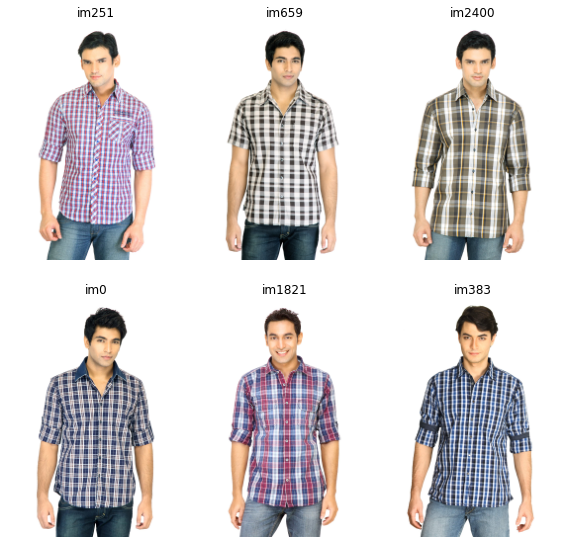

In [266]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_onehot, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)


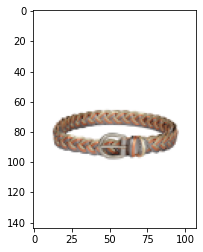

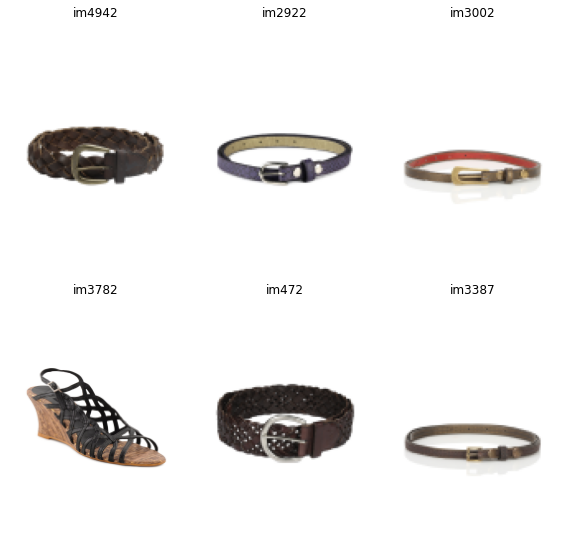

In [270]:
# Idx Item to Recommender
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_onehot, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

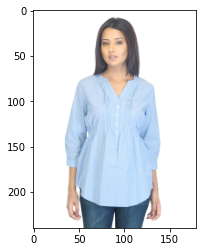

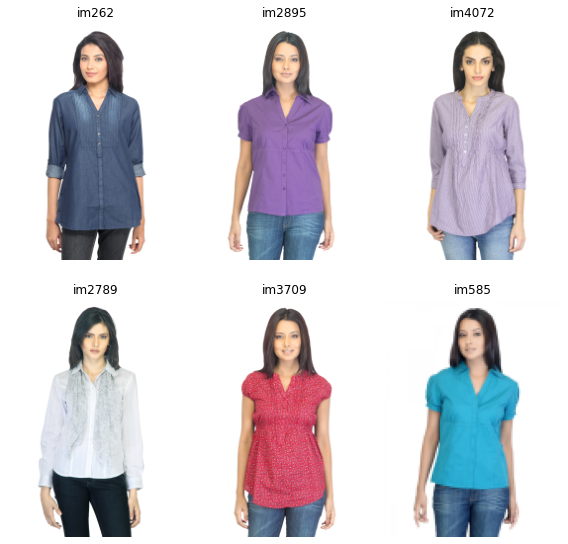

In [287]:
# Idx Item to Recommender
idx_ref = 180

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df_onehot, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [205]:
augmentedDataframe = pd.DataFrame({
    'filename': df_filtered['image'],
    'gender': df_filtered['gender'],
    'type': df_filtered['articleType'],
    'color': df_filtered['baseColour'],
    'season': df_filtered['season'],
    'usage': df_filtered['usage']
})

# total number of entries in the dataframe
total_row = len(augmentedDataframe)
print('total row count: ', total_row)

augmentedDataframe.head(10)

total row count:  4926


,filename,gender,type,color,season,usage
0,15970.jpg,Men,Shirts,Navy Blue,Fall,Casual
1,39386.jpg,Men,Jeans,Blue,Summer,Casual
2,59263.jpg,Women,Watches,Silver,Winter,Casual
3,21379.jpg,Men,Track Pants,Black,Fall,Casual
4,53759.jpg,Men,Tshirts,Grey,Summer,Casual
5,1855.jpg,Men,Tshirts,Grey,Summer,Casual
6,30805.jpg,Men,Shirts,Green,Summer,Ethnic
7,26960.jpg,Women,Shirts,Purple,Summer,Casual
8,29114.jpg,Men,Socks,Navy Blue,Summer,Casual
9,30039.jpg,Men,Watches,Black,Winter,Casual


In [206]:
len(augmentedDataframe['type'].unique())


108

In [207]:
len(augmentedDataframe['gender'].unique())


5

In [208]:
len(augmentedDataframe['color'].unique())


45

In [209]:
len(augmentedDataframe['season'].unique())


5

In [210]:
len(augmentedDataframe['usage'].unique())

7

In [211]:
unique_types = augmentedDataframe['type'].unique().tolist()
print(unique_types)


['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Leggings', 

In [215]:
unique_gender = augmentedDataframe['gender'].unique().tolist()
print(unique_gender)

['Men', 'Women', 'Boys', 'Girls', 'Unisex']


In [212]:
augmentedDataframe['number_types'] = augmentedDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)


In [216]:
augmentedDataframe['number_gender'] = augmentedDataframe['gender'].apply(lambda x: unique_gender.index(x) if x in unique_gender else 0)


In [218]:
unique_color = augmentedDataframe['color'].unique().tolist()
print(unique_color)

['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple', 'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink', 'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown', 'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta', 'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin', 'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve', 'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude', 'Mushroom Brown']


In [219]:
augmentedDataframe['number_color'] = augmentedDataframe['color'].apply(lambda x: unique_color.index(x) if x in unique_color else 0)


In [221]:
unique_season = augmentedDataframe['season'].unique().tolist()
print(unique_season)

['Fall', 'Summer', 'Winter', 'Spring', nan]


In [222]:
augmentedDataframe['number_season'] = augmentedDataframe['season'].apply(lambda x: unique_season.index(x) if x in unique_season else 0)


In [224]:
unique_usage = augmentedDataframe['usage'].unique().tolist()
print(unique_usage)

['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual', 'Travel']


In [225]:
augmentedDataframe['number_usage'] = augmentedDataframe['usage'].apply(lambda x: unique_usage.index(x) if x in unique_usage else 0)


In [226]:
augmentedDataframe.head(10)

,filename,gender,type,color,season,usage,number_types,number_gender,number_color,number_season,number_usage
0,15970.jpg,Men,Shirts,Navy Blue,Fall,Casual,0,0,0,0,0
1,39386.jpg,Men,Jeans,Blue,Summer,Casual,1,0,1,1,0
2,59263.jpg,Women,Watches,Silver,Winter,Casual,2,1,2,2,0
3,21379.jpg,Men,Track Pants,Black,Fall,Casual,3,0,3,0,0
4,53759.jpg,Men,Tshirts,Grey,Summer,Casual,4,0,4,1,0
5,1855.jpg,Men,Tshirts,Grey,Summer,Casual,4,0,4,1,0
6,30805.jpg,Men,Shirts,Green,Summer,Ethnic,0,0,5,1,1
7,26960.jpg,Women,Shirts,Purple,Summer,Casual,0,1,6,1,0
8,29114.jpg,Men,Socks,Navy Blue,Summer,Casual,5,0,0,1,0
9,30039.jpg,Men,Watches,Black,Winter,Casual,2,0,3,2,0


In [228]:
number_df = augmentedDataframe.drop(['gender', 'type', 'color', 'season', 'usage'], axis=1)

In [229]:
number_df.head()

,filename,number_types,number_gender,number_color,number_season,number_usage
0,15970.jpg,0,0,0,0,0
1,39386.jpg,1,0,1,1,0
2,59263.jpg,2,1,2,2,0
3,21379.jpg,3,0,3,0,0
4,53759.jpg,4,0,4,1,0


In [230]:
number_df.

(4926, 6)